In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADistanceMap, PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble
from src.Logger import Logger


In [3]:
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"site": 'MT',
	"training_date": "current",
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": False
}

config['training'] = False
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
# site = 'PA'

if config['site'] == 'PA':
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

elif config['site'] == 'MT':
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		if config['training_date'] == "current":
			exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] 
		elif config['training_date'] == "earlier":
			exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] 

	if type(dataset) == MTMultipleDates:
		if config['training_date'] == "current":
			exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] 
		elif config['training_date'] == "earlier":
			exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] 

logger = Logger()
trainer = TrainerEnsemble(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp_ids)


{'site': 'MT', 'training_date': 'current', 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': False, 'training': False}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[108, 109, 110, 111, 112, 113, 114, 115, 116, 117]

In [7]:
trainer.classes_mode

False

In [8]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


Removing bufer................
Mask label shape:  
 (16795, 10420, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3359 2084
Mask size:  (16795, 10420)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [109996296   2271496  62736108]
[62.9, 1.3, 35.8]


In [14]:
# pdb.set_trace()

In [15]:

trainer.getLabelCurrentDeforestation()

In [16]:

trainer.loadInputImage()

ic| image_stack.shape: (16795, 10420, 21)


Image shape:  (16795, 10420, 21)
mask:  (16795, 10420)
image stack:  (16795, 10420, 21)
ref : (16795, 10420, 1)


In [17]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.07692308, 0.15384616, 0.23076925, 0.30769232,
        0.3846154 , 0.4615385 , 0.53846157, 0.61538464, 0.6923077 ,
        0.7692308 , 0.84615386, 0.923077  , 1.        ], dtype=float32),
 array([112618766,   2096062,   1054083,   1098901,   1007787,    876898,
           648966,    708581,    287191,    313901,    338545,    240796,
          1332783,  52380640], dtype=int64))

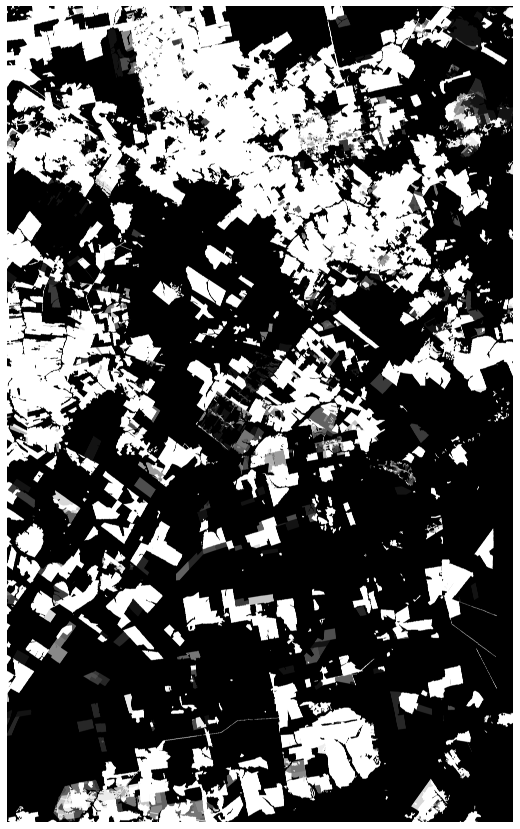

In [18]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [19]:

trainer.getImageChannels()

ic| self.image_stack.shape: (16795, 10420, 21)
ic| self.channels: 21


In [20]:

trainer.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 24]
Validation tiles:  [9, 11, 25]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


In [21]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [22]:
if config["training"] == True:
    trainer.extractCoords()

In [23]:
if config["training"] == True:
    trainer.trainTestSplit()

In [24]:
if config["training"] == True:
    trainer.label_mask.shape

In [25]:
if config["training"] == True:
    trainer.logger.plotFigure(trainer.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)




In [26]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [27]:
if config["training"] == True:
    print(trainer.coords_train)

In [28]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [29]:
if config["training"] == True:
    inputSnipShow = True

In [30]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [31]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [36]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [37]:
if config["training"] == True:
    trainer.getGenerators()


In [38]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [39]:
if config["training"] == True:
    print(trainer.path_exp)

In [40]:
if config["training"] == True:
    print(trainer.channels)

In [41]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [42]:
if config["training"] == True:
    trainer.train()

In [43]:
if config["training"] == True:
    trainer.plotHistory()


In [44]:
trainer.image_stack.shape

(16795, 10420, 21)

In [45]:
trainer.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [46]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [47]:
trainer.image_stack.shape

(16795, 10420, 21)

In [48]:
trainer.setPadding()

-5.0 -12.0


In [49]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [50]:
trainer.loadPredictedProbabilities()

In [51]:
trainer.prob_rec.shape

(16800, 10432, 10)

In [52]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [53]:
trainer.prob_rec.shape

(16800, 10432, 10)

In [54]:
trainer.getMeanProb()


In [55]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 2.9159002e-20
    np.mean(value): 0.015122748
    np.max(value): 1.0


In [56]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (16800, 10432)


(16800, 10432)

In [57]:
trainer.unpadMeanProb()

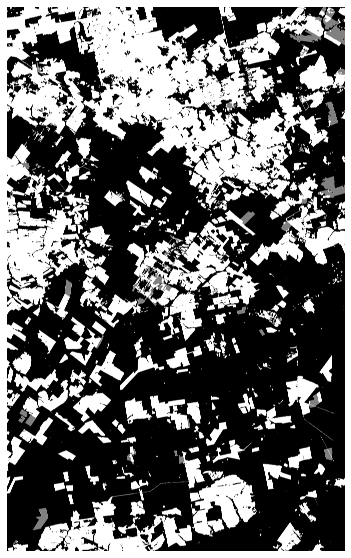

In [58]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [59]:
trainer.squeezeLabel()

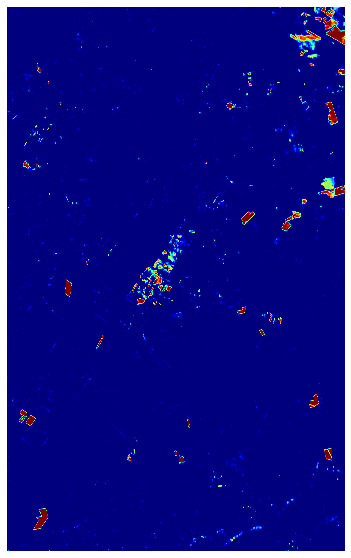

In [60]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [61]:
print(trainer.label_mask.shape)

(16795, 10420)


In [62]:
trainer.getLabelTest()

(44657480,)
(array([0, 1], dtype=uint8), array([43783238,   874242], dtype=int64))


In [63]:
# trainer.getMAP()

In [64]:
trainer.prob_rec.shape

(16800, 10432, 10)

In [65]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 16800, 10432, 1)


In [66]:
trainer.prob_rec.shape

(10, 16800, 10432, 1)

In [67]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0
    np.mean(value): 0.0151181035
    np.max(value): 1.0


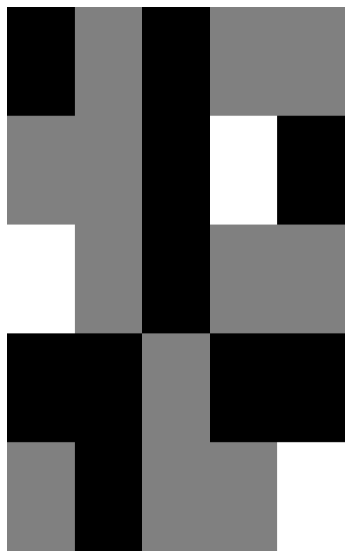

In [68]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [69]:
trainer.getLabelCurrentDeforestation()

In [70]:
trainer.applyProbabilityThreshold()

(16795, 10420)
(array([0., 1.], dtype=float32), array([172681153,   2322747], dtype=int64))


ic| self.predicted_unpad.shape: (16795, 10420)
    self.predicted.shape: (16795, 10420)


In [71]:
trainer.getTestValues()

ic| predicted_test.shape: (70001560,)
ic| predicted_test.shape: (44657480,)


In [72]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([172681153,   2322747], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([172776032,   2227868], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([174909021,     94879], dtype=int64))


In [73]:
trainer.calculateMetrics()

ic| self.f1: 81.37, self.precision: 81.59, self.recall: 81.16


In [74]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (21000468,)
ic| self.label_mask_val_valid.shape: (11795630,)
ic| f1_val: 97.72
    precision_val: 98.05
    recall_val: 97.39
    mAP_val: 99.49


In [75]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [76]:
trainer.get_label_no_buffer()


D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))
ic| label_per_date.shape: (16795, 10420, 1)


In [77]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([174491508,    512392], dtype=int64))


In [78]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


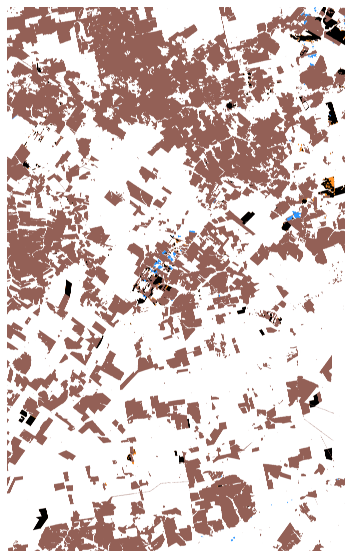

In [79]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [80]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [81]:
trainer.prob_rec.shape

(10, 16800, 10432, 1)

In [82]:
trainer.setUncertainty()

K = 1, pred_mean shape (16800, 10432, 1)


In [83]:
trainer.uncertainty_map[trainer.uncertainty_map>1] = 1

In [84]:
trainer.uncertainty_map.shape

(16800, 10432)

In [85]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| np.min(value): -0.0
    np.mean(value): 0.0066735353
    np.max(value): 0.36787948


In [86]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.005957873
    np.max(value): 0.36787948


In [87]:
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.005957873
    np.max(value): 0.36787948


ic| trainer.uncertainty_to_show.shape: (16795, 10420)


(16795, 10420)

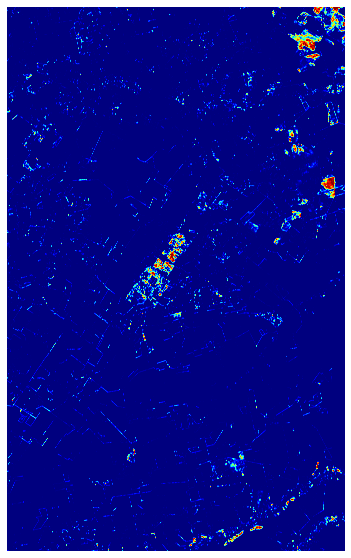

In [88]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



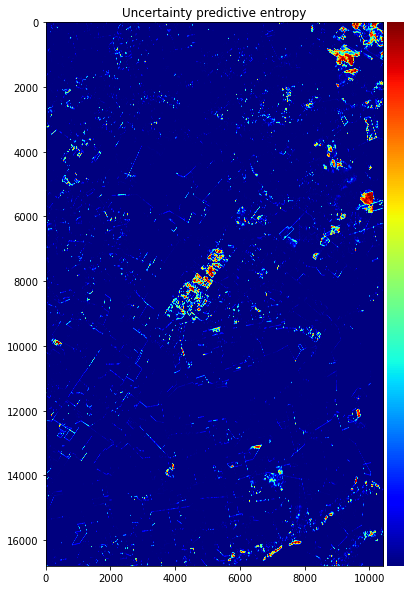

In [89]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [90]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (16795, 10420)
ic| self.mask_amazon_ts.shape: (16795, 10420)
ic| self.label_mask_test.shape: (70001560,)
ic| self.error_mask_test.shape: (44623406,)


ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


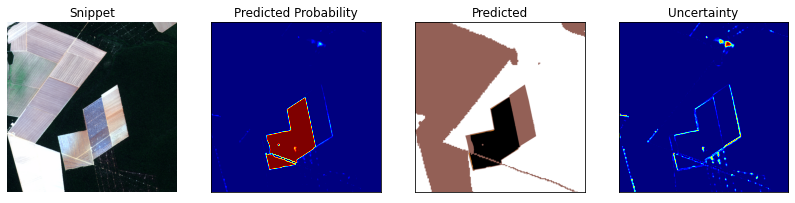

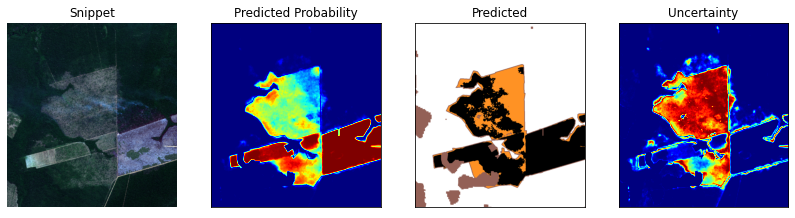

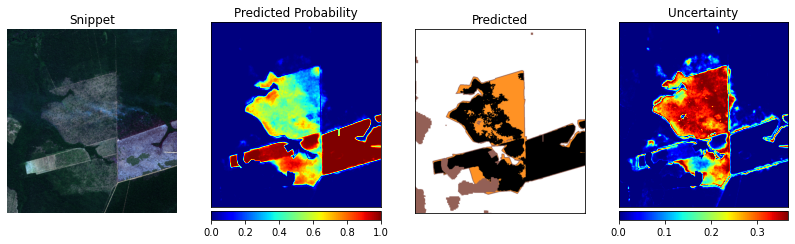

In [91]:
trainer.logger.plotCropSample(trainer)

In [92]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): -0.0
    np.mean(value): 0.009591337
    np.max(value): 0.36787948


In [93]:

label_tmp_dates = []
for date in dataset.prodes_dates:
    label_tmp_date = dataset.loadLabelFromDate(date)
    label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
    label_tmp_dates.append(label_tmp_date)

D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


D:/Jorge/datasets/deforestation/MT/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Label where deforestation past years is actual date (2021) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MT/deforestation_before_2008_MT.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([122623260,  52380640], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([161124576,   1332784,    240796,    338545,    313901,    287191,
                                                                       708581,    648966,    876898,   1007787,   1098901,   1054092,
                                                                      2096062,   2473828,   1400992], dtype=int64))


In [94]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([112618766,   2096062,  60289072], dtype=int64))

In [95]:
label_tmp_dates[0].shape

(16795, 10420)

In [96]:
# del trainer.image_stack
import src.lansdatLoader as ll
import importlib
importlib.reload(ll)
landsatLoader = ll.LandsatLoader(dataset)
ims = landsatLoader.load()
for idx in range(len(ims)):
    ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

Loading D:/Jorge/datasets/landsat/MT/landsat_MT_2019.tif
D:/Jorge/datasets/landsat/MT/landsat_MT_2019.tif
Loading D:/Jorge/datasets/landsat/MT/landsat_MT_2020.tif
D:/Jorge/datasets/landsat/MT/landsat_MT_2020.tif
Loading D:/Jorge/datasets/landsat/MT/landsat_MT_2021.tif
D:/Jorge/datasets/landsat/MT/landsat_MT_2021.tif


In [97]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1], dtype=uint8), array([172907838,   2096062], dtype=int64))

In [98]:
ims[0].shape

(16795, 10420, 3)

In [99]:
trainer.classes_mode

False

In [100]:
'''
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_figheight(20)
fig.set_figwidth(20)
lims = trainer.dataset.previewLims1
axes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)
'''

'\nfig, axes = plt.subplots(2, 3)\naxes = axes.flatten()\nfig.set_figheight(20)\nfig.set_figwidth(20)\nlims = trainer.dataset.previewLims1\naxes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)\n'

In [101]:
# trainer.dataset.previewLims2 = np.array([5000, 6000, 9500, 10500])

In [102]:
import src.Logger as lg 
importlib.reload(lg)
logger = lg.Logger()


In [103]:
import src.plot as _plt

def plotCropSampleLandsat(self, trainer, landsat_ims):

    uncertainty_vlims = [np.min(trainer.uncertainty_to_show), np.max(trainer.uncertainty_to_show)]

    self.plotCropSampleFlag = True
    if self.plotCropSampleFlag == True:
        ic(trainer.dataset.previewLims1, trainer.dataset.previewLims2)
        lims = trainer.dataset.previewLims1
        ic(np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = trainer.dataset.previewLims2
        ic(np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        ims = [landsat_ims[0], landsat_ims[1], landsat_ims[2],
                trainer.mean_prob, 
                trainer.error_mask_to_show_rgb[...,::-1], trainer.uncertainty_to_show]
        print([x.shape for x in ims])

        # trainer.dataset.prodes_dates = ['21/07/2018', '24/07/2019', '26/07/2020']
        # trainer.dataset.prodes_dates = ['02/08/2019', '05/08/2020', '22/07/2021']
        
        titles = ['Snippet $\mathregular{T_{-1}}$'+' ({})'.format(trainer.dataset.prodes_dates_to_print[0]), 
                    'Snippet $\mathregular{T_{0}}$'+' ({})'.format(trainer.dataset.prodes_dates_to_print[1]), 
                    'Snippet $\mathregular{T_{1}}$'+' ({})'.format(trainer.dataset.prodes_dates_to_print[2]), 
                        'Prediction Probability at $\mathregular{T_{0}}$', 
                        'Prediction at $\mathregular{T_{0}}$', 
                        'Uncertainty at $\mathregular{T_{0}}$']
        cmaps = [plt.cm.gray, plt.cm.gray, plt.cm.gray,
                            'jet', plt.cm.gray, 'jet']

        # trainer.dataset.hspace = [-0.1, 0.03]
        _plt.plotCropSample6(ims[:], 
                lims = trainer.dataset.previewLims1, 
                titles = titles,
                cmaps = cmaps,
                uncertainty_vlims = uncertainty_vlims,
                polygons = trainer.dataset.polygons[0],
                hspace = trainer.dataset.hspace[0]) # -0.1
        save_name = 'output/figures/{}PredictSampleUncertaintyLandsat1_exp{}.png'.format(
            trainer.dataset.__class__.__name__, str(trainer.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')
        

        _plt.plotCropSample6(ims[:], 
                lims = trainer.dataset.previewLims2, 
                titles = titles,
                cmaps = cmaps,
                uncertainty_vlims = uncertainty_vlims,
                polygons = trainer.dataset.polygons[1],
                hspace = trainer.dataset.hspace[1]) # 0.
        save_name = 'output/figures/{}PredictSampleUncertaintyLandsat2_exp{}.png'.format(
            trainer.dataset.__class__.__name__, str(trainer.exp))
        plt.savefig(save_name, dpi=150, bbox_inches='tight')

        _plt.plotCropSample6(ims[:], 
                lims = trainer.dataset.previewLims2, 
                titles = titles,
                cmaps = cmaps,
                #maskBackground = [False, True, False, True],
                #invertMask = [False, False, False, False], 
                uncertainty_vlims = uncertainty_vlims,
                polygons = trainer.dataset.polygons[1],
                colorbar = True)
        plt.savefig('output/figures/' + trainer.dataset.__class__.__name__ + 'PredictSampleUncertaintyLandsatColorbar.png', dpi=150, bbox_inches='tight')


In [104]:


import types

logger.plotCropSampleLandsat = types.MethodType(plotCropSampleLandsat, trainer)


In [105]:
trainer.dataset.hspace = [-0.1, 0.03]

ic| trainer.dataset.previewLims1: array([11500, 12500,  9000, 10000])
    trainer.dataset.previewLims2: array([ 5000,  6000,  9500, 10500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([920000], dtype=int64))


[(16795, 10420, 3), (16795, 10420, 3), (16795, 10420, 3), (16795, 10420), (16795, 10420, 3), (16795, 10420)]
(1000, 1000, 3)
(1000, 920, 3)
(1000, 920, 3)


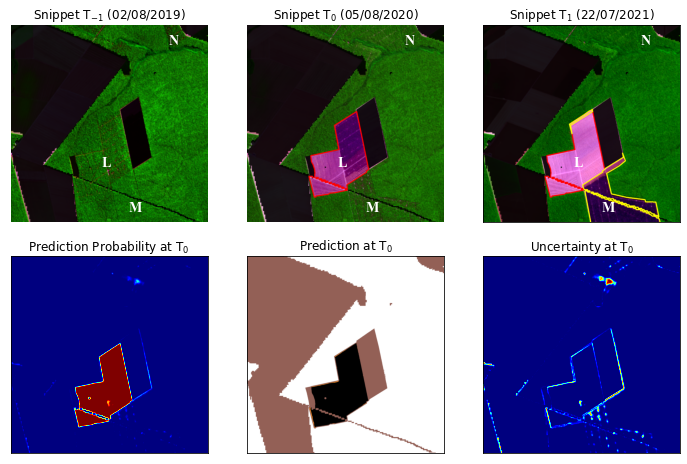

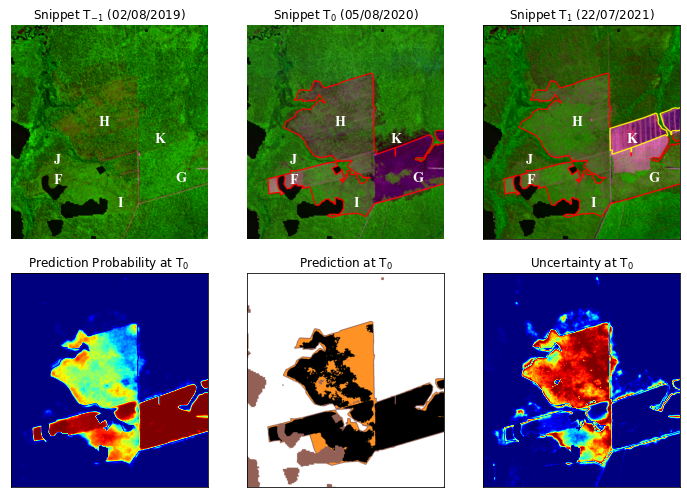

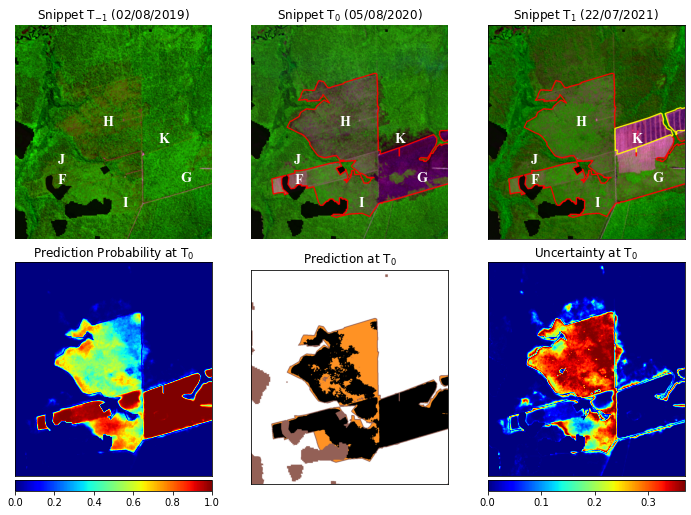

In [106]:
logger.plotCropSampleLandsat(trainer, ims)

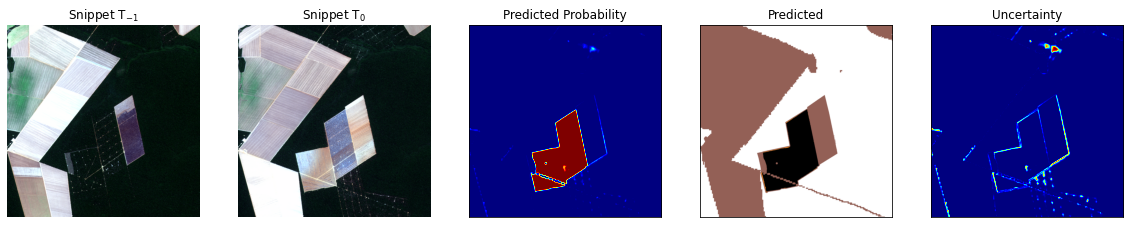

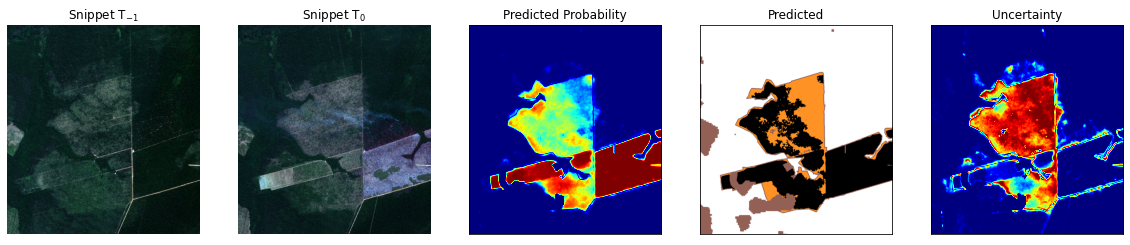

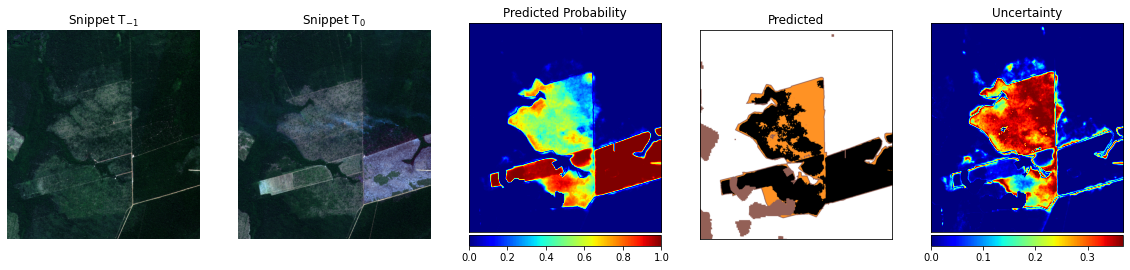

In [107]:
logger.plotCropSampleT0T1(trainer)

In [108]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [109]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [110]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): -0.0
    np.mean(value): 0.009591337
    np.max(value): 0.36787948


In [111]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [112]:
trainer.uncertainty.shape

(44623406,)

In [113]:
np.mean(trainer.mean_prob)

0.014524314

In [114]:
trainer.prob_rec.shape

(10, 16800, 10432, 1)

(16795, 10420)
[[550, 115], [430, 950]]


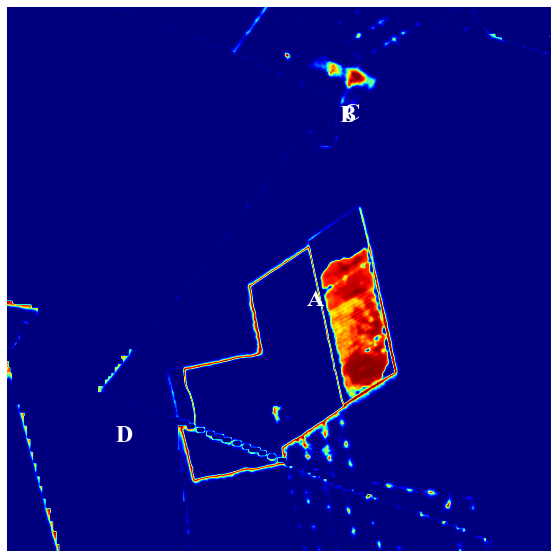

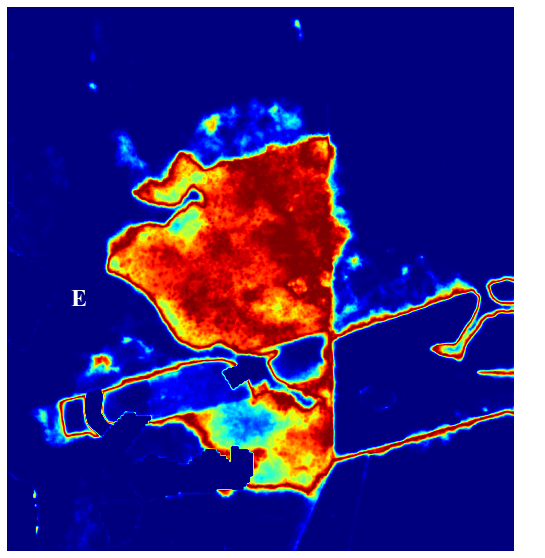

In [117]:
print(trainer.mean_prob.shape)
font = {'family': "Times New Roman",
        'color':  'white',
        'weight': 'bold',
        'size': 24,
        }

lims = dataset.previewLims1
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['A', 'B', 'C', 'D', 'E', 'F']

for poi_id in range(4):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')

plt.savefig(os.path.join('output/pdf_plot_results', 
                         'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

lims = dataset.previewLims2
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['E', 'F']

print(trainer.dataset.snippet_coords['snippet_id1'])
for poi_id in range(2):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')
        
plt.savefig(os.path.join('output/pdf_plot_results', 
                         'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [118]:
'''
print(trainer.mean_prob.shape)

lims = dataset.previewLims1
im = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(15,15))
plt.imshow(im, cmap='jet')
'''

"\nprint(trainer.mean_prob.shape)\n\nlims = dataset.previewLims1\nim = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]\nplt.figure(figsize=(15,15))\nplt.imshow(im, cmap='jet')\n"

In [119]:
'''
def getPOIValues(self):
    self.snippet_poi_results = []

    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]
    for snippet_id, lims in enumerate(lims_snippets):
        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:
            dict_ = {"snippet_id": snippet_id,
                    "coords": coord, # 10,1 alpha
                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
            
            predicted_coord = []
            for idx in range(self.prob_rec.shape[0]):
                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])
            predicted_coord = np.array(predicted_coord)
            dict_["predicted"] = predicted_coord

            self.snippet_poi_results.append(dict_)

    return self.snippet_poi_results
'''

'\ndef getPOIValues(self):\n    self.snippet_poi_results = []\n\n    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]\n    for snippet_id, lims in enumerate(lims_snippets):\n        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:\n            dict_ = {"snippet_id": snippet_id,\n                    "coords": coord, # 10,1 alpha\n                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}\n            \n            predicted_coord = []\n            for idx in range(self.prob_rec.shape[0]):\n                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])\n            predicted_coord = np.array(predicted_coord)\n            dict_["predicted"] = predicted_coord\n\n            self.snippet_poi_results.append(dict_)\n\n    return self.snippet_poi_results\n'

In [120]:

'''
import types

trainer.getPOIValues = types.MethodType(getPOIValues, trainer)
'''


'\nimport types\n\ntrainer.getPOIValues = types.MethodType(getPOIValues, trainer)\n'

In [122]:

if config['dataset'] == 'PA':
    trainer.getPOIValues()


In [123]:

import pickle
with open('output/log/log_ensemble_.pkl', 'wb') as f:
            pickle.dump(trainer.snippet_poi_results, f)


In [124]:
def getUncertaintyAAValues(self):



        # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

        # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
        if self.config['uncertainty_method'] == "pred_entropy":
                if self.classes_mode == False:
                        self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                                0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                        # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                        #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                else:
                        self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                        0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                        
                        # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                        # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
        elif self.config['uncertainty_method'] == "pred_var":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
        elif self.config['uncertainty_method'] == "MI":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
        elif self.config['uncertainty_method'] == "KL":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
        elif self.config['uncertainty_method'] == "evidential":
                # self.threshold_list = [0.015, 0.03, 0.04]
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [ 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [ 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

                self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

                # self.threshold_list = [ 0.15, 0.2,  
                #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

                # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

                # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                        
                # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
        print(self.threshold_list)
        self.loadThresholdMetrics = False
        if self.loadThresholdMetrics == False:
                # self.threshold_list = [0.1]
                # y_test
                ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

                metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, self.threshold_list)

                # ic(metrics_values)


        self.m = {'precision_L': metrics_values[:,0],
                'recall_L': metrics_values[:,1],
                'recall_Ltotal': metrics_values[:,2],
                'AA': metrics_values[:,3],
                'precision_H': metrics_values[:,4],
                'recall_H': metrics_values[:,5],
                'UEO': metrics_values[:,6]}

        self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
        self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [125]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)


Get precision-recall threshold

In [126]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (44623406,)
    self.label_mask_current_deforestation_test.shape: (44623406,)


[0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.3648794801235199, 0.3663794801235199]
threshold 0.0025


ic| label_current_deforestation_test_classified_incorrect.shape: (4264894,)
    predicted_test_classified_incorrect.shape: (4264894,)
ic| TP_H + FN_H + FP_H + TN_H: 4264894
    len(label_mask_current_deforestation_test): 44623406
ic| TP_H + FN_H + FP_H + TN_H: 4264894
    len(label_mask_current_deforestation_test): 44623406


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54181542,)
    self.label_mask_current_deforestation_test.shape: (54181542,)


threshold 0.0025
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    2158   738688]]
[1.         0.99708711]
threshold 0.005
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    3320   737526]]
[1.         0.99551864]
threshold 0.0075
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    4287   736559]]
[1.         0.99421337]
threshold 0.01
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    5334   735512]]
[1.         0.99280012]
threshold 0.015
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    7178   733668]]
[1.         0.99031108]
threshold 0.025
(54181542,) (54181542,)
cm_audited [[53440692        4]
 [    9990   730856]]
[0.99999453 0.98651542]
threshold 0.05
(54181542,) (54181542,)
cm_audited [[53440435      261]
 [   15247   725599]]
[0.99964043 0.97941947]
threshold 0.08
(54181542,) (54181542,)
cm_audited [[53440237      459]
 [   20003   720843]]
[0.99936365 0.97299979]
threshold 0.1
(54181542,) (54181542,)
cm_audited [[534401

ic| metric_values_audited: array([[1.        , 0.99708711],
                                  [1.        , 0.99551864],
                                  [1.        , 0.99421337],
                                  [1.        , 0.99280012],
                                  [1.        , 0.99031108],
                                  [0.99999453, 0.98651542],
                                  [0.99964043, 0.97941947],
                                  [0.99936365, 0.97299979],
                                  [0.99919437, 0.96930941],
                                  [0.9987929 , 0.96051541],
                                  [0.99830836, 0.95111265],
                                  [0.99788398, 0.94591184],
                                  [0.997269  , 0.94046266],
                                  [0.99667829, 0.9359786 ],
                                  [0.99531534, 0.92889345],
                                  [0.99327838, 0.9187402 ],
                                  [0.992

cm_audited [[53425024    15672]
 [  198560   542286]]
[0.97191186 0.73198209]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

In [ ]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [ ]:
trainer.xlim


[-0.1, 10.4]

In [ ]:
def plotUncertaintyAA(self, normalize_xlim = True):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax1.plot(self.m['AA']*100, self.m['precision_L']*100, 'C3-', label="Precision Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_L']*100, 'C3--', label="Recall Low Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['precision_H']*100, 'C0-', label="Precision High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m['recall_H']*100, 'C0--', label="Recall High Uncertainty")
    ax1.plot(self.m['AA']*100, self.m_audited['precision']*100, 'C2-', label="Precision Audited")
    ax1.plot(self.m['AA']*100, self.m_audited['recall']*100, 'C2--', label="Recall Audited")

    ax1.legend(loc="lower right")
    ax1.set_ylabel('Precision/recall (%)')
    ax1.set_xlabel('Audit Area (%)')
    ax1.set_ylim(self.ylim)
    ax1.set_xlim(self.xlim)
    ax1.grid()

    xs = [0, 120]
    ax1.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = 'vline_multiple - full height')

    ax2.plot(range(int(self.xlim[0]), int(self.xlim[1] + 2)), 
        np.ones(int(self.xlim[1] + 2)) * self.f1, 
        'C1:', label="F1 No Uncertainty")

    ax2.plot(self.m['AA']*100, self.m['f1_L']*100, 'C3-', label="F1 Low Uncertainty")
    ax2.plot(self.m['AA']*100, self.m['f1_H']*100, 'C0-', label="F1 High Uncertainty")
    ax2.plot(self.m['AA']*100, self.m_audited['f1']*100, 'C2-', label="F1 Audited")

    ax2.legend(loc="lower right")
    ax2.set_ylabel('F1 score (%)')
    ax2.set_xlabel('Audit Area (%)')
    ax2.set_ylim(self.ylim)
    ax2.set_xlim(self.xlim)

    ax2.grid()

    xs = [0, 120]
    ax2.vlines(x = 3, ymin = 0, ymax = max(xs),
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    ax3.plot(np.asarray(self.threshold_list), self.m['AA']*100, label="AA")
    ax3.set_ylabel('Audit Area (%)')
    ax3.set_xlabel('Uncertainty Threshold')
    ax3.grid()
    ax3.set_ylim(self.xlim)

    self.xlim_adjusted = ax3.get_xlim()
    ax3.hlines(y = 3, xmin = self.xlim_adjusted[0], xmax = self.xlim_adjusted[1],
            colors = (0.2, 0.2, 0.2),
            label = '3% AA')

    if normalize_xlim == True:
        self.xlim_adjusted = (0,1)


    ax3.set_xlim(self.xlim_adjusted)

    # if save_figures == True:
    if True:
        plt.savefig('output/figures/recall_precision_f1_AA.png', dpi=150, bbox_inches='tight')


In [ ]:


import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)


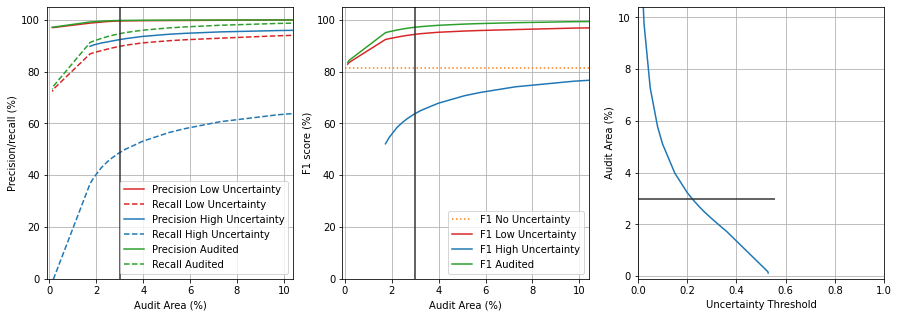

In [ ]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA(normalize_xlim=True)

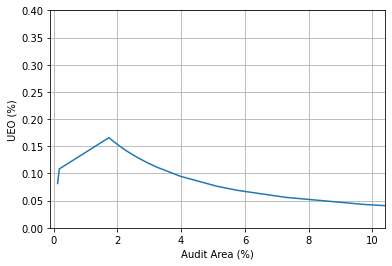

In [ ]:
trainer.plotUEO()

In [ ]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.5292378768920899)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.20307793182207062
threshold 0.20307793182207062


ic| label_current_deforestation_test_classified_incorrect.shape: (1732305,)
    predicted_test_classified_incorrect.shape: (1732305,)
ic| TP_H + FN_H + FP_H + TN_H: 1732305
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1732305
    len(label_mask_current_deforestation_test): 54181542


[0.99639047 0.90148085 0.45309012 0.03197224 0.92702418 0.49834732
 0.11259204]
0.3276599450700193
threshold 0.3276599450700193


ic| label_current_deforestation_test_classified_incorrect.shape: (1080119,)
    predicted_test_classified_incorrect.shape: (1080119,)
ic| TP_H + FN_H + FP_H + TN_H: 1080119
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1080119
    len(label_mask_current_deforestation_test): 54181542


[0.98992077 0.87584885 0.55082838 0.01993518 0.90617133 0.40458021
 0.15340871]
0.12608201324794868
threshold 0.12608201324794868


ic| label_current_deforestation_test_classified_incorrect.shape: (2412828,)
    predicted_test_classified_incorrect.shape: (2412828,)
ic| TP_H + FN_H + FP_H + TN_H: 2412828
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 2412828
    len(label_mask_current_deforestation_test): 54181542


[0.99740302 0.91511429 0.38206861 0.04453229 0.94054254 0.54746997
 0.08616124]
0.23666445409024492
threshold 0.23666445409024492


ic| label_current_deforestation_test_classified_incorrect.shape: (1524787,)
    predicted_test_classified_incorrect.shape: (1524787,)
ic| TP_H + FN_H + FP_H + TN_H: 1524787
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1524787
    len(label_mask_current_deforestation_test): 54181542


[0.99532322 0.89463879 0.4803144  0.02814219 0.92111254 0.47644419
 0.12346098]
0.22213843281379345
threshold 0.22213843281379345


ic| label_current_deforestation_test_classified_incorrect.shape: (1610788,)
    predicted_test_classified_incorrect.shape: (1610788,)
ic| TP_H + FN_H + FP_H + TN_H: 1610788
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1610788
    len(label_mask_current_deforestation_test): 54181542


[0.99586687 0.89751842 0.46866015 0.02972946 0.92362598 0.48616934
 0.11872879]
0.22015933360328882
threshold 0.22015933360328882


ic| label_current_deforestation_test_classified_incorrect.shape: (1622893,)
    predicted_test_classified_incorrect.shape: (1622893,)
ic| TP_H + FN_H + FP_H + TN_H: 1622893
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1622893
    len(label_mask_current_deforestation_test): 54181542


[0.99593274 0.89791634 0.46702689 0.02995288 0.92398079 0.4874956
 0.11809151]
0.21363481869835646
threshold 0.21363481869835646


ic| label_current_deforestation_test_classified_incorrect.shape: (1663699,)
    predicted_test_classified_incorrect.shape: (1663699,)
ic| TP_H + FN_H + FP_H + TN_H: 1663699
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1663699
    len(label_mask_current_deforestation_test): 54181542


[0.99614185 0.89936485 0.46177478 0.03070601 0.9251005  0.49159967
 0.11601335]
0.21890468144849173
threshold 0.21890468144849173


ic| label_current_deforestation_test_classified_incorrect.shape: (1630681,)
    predicted_test_classified_incorrect.shape: (1630681,)
ic| TP_H + FN_H + FP_H + TN_H: 1630681
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1630681
    len(label_mask_current_deforestation_test): 54181542


[0.99597533 0.89823536 0.46597673 0.03009661 0.92420647 0.48830634
 0.11770376]
0.2199506871915164
threshold 0.2199506871915164


ic| label_current_deforestation_test_classified_incorrect.shape: (1624162,)
    predicted_test_classified_incorrect.shape: (1624162,)
ic| TP_H + FN_H + FP_H + TN_H: 1624162
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1624162
    len(label_mask_current_deforestation_test): 54181542


[0.9959369  0.89796242 0.46684601 0.0299763  0.92402521 0.48764071
 0.11802635]
0.21966800191891
threshold 0.21966800191891


ic| label_current_deforestation_test_classified_incorrect.shape: (1625939,)
    predicted_test_classified_incorrect.shape: (1625939,)
ic| TP_H + FN_H + FP_H + TN_H: 1625939
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625939
    len(label_mask_current_deforestation_test): 54181542


[0.99594627 0.89802901 0.46660305 0.03000909 0.92407832 0.4878327
 0.11793606]
0.21959976083494728
threshold 0.21959976083494728


ic| label_current_deforestation_test_classified_incorrect.shape: (1626343,)
    predicted_test_classified_incorrect.shape: (1626343,)
ic| TP_H + FN_H + FP_H + TN_H: 1626343
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1626343
    len(label_mask_current_deforestation_test): 54181542


[0.99594866 0.89804848 0.4665477  0.03001655 0.92408997 0.48787388
 0.11791687]
0.21975300431820977
threshold 0.21975300431820977


ic| label_current_deforestation_test_classified_incorrect.shape: (1625407,)
    predicted_test_classified_incorrect.shape: (1625407,)
ic| TP_H + FN_H + FP_H + TN_H: 1625407
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625407
    len(label_mask_current_deforestation_test): 54181542


[0.99594402 0.89800339 0.46667459 0.02999928 0.92406182 0.48777972
 0.11796164]
0.21982851245681917
threshold 0.21982851245681917


ic| label_current_deforestation_test_classified_incorrect.shape: (1624935,)
    predicted_test_classified_incorrect.shape: (1624935,)
ic| TP_H + FN_H + FP_H + TN_H: 1624935
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1624935
    len(label_mask_current_deforestation_test): 54181542


[0.99593892 0.89798038 0.46674748 0.02999056 0.92404982 0.48772391
 0.11798299]
0.21971966772541263
threshold 0.21971966772541263


ic| label_current_deforestation_test_classified_incorrect.shape: (1625645,)
    predicted_test_classified_incorrect.shape: (1625645,)
ic| TP_H + FN_H + FP_H + TN_H: 1625645
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625645
    len(label_mask_current_deforestation_test): 54181542


[0.99594661 0.8980087  0.46664219 0.03000367 0.9240666  0.48780741
 0.11794882]
0.2197863409110069
threshold 0.2197863409110069


ic| label_current_deforestation_test_classified_incorrect.shape: (1625192,)
    predicted_test_classified_incorrect.shape: (1625192,)
ic| TP_H + FN_H + FP_H + TN_H: 1625192
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625192
    len(label_mask_current_deforestation_test): 54181542
ic| self.threshold_optimal: 0.21975300431820977


[0.99594149 0.89799475 0.46671373 0.02999531 0.92405501 0.48774757
 0.11797149]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.21975300431820977


ic| label_current_deforestation_test_classified_incorrect.shape: (1625407,)
    predicted_test_classified_incorrect.shape: (1625407,)
ic| TP_H + FN_H + FP_H + TN_H: 1625407
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625407
    len(label_mask_current_deforestation_test): 54181542


[0.99594402 0.89800339 0.46667459 0.02999928 0.92406182 0.48777972
 0.11796164]
threshold 0.21975300431820977
(54181542,) (54181542,)


ic| self.m_optimal: {'AA': array([0.02999928]),
                     'UEO': array([0.11796164]),
                     'f1': 81.41,
                     'f1_H': array([0.63851162]),
                     'f1_L': array([0.94444133]),
                     'precision_H': array([0.92406182]),
                     'precision_L': array([0.99594402]),
                     'recall_H': array([0.48777972]),
                     'recall_L': array([0.89800339]),
                     'recall_Ltotal': array([0.46667459])}
ic| self.m_audited_optimal: {'f1': array([0.97182704]),
                             'precision': array([0.99799711]),
                             'recall': array([0.94699438])}


cm_audited [[53439288     1408]
 [   39269   701577]]
[0.99799711 0.94699438]


{'metrics': {'precision_L': array([0.99594402]),
  'recall_L': array([0.89800339]),
  'recall_Ltotal': array([0.46667459]),
  'AA': array([0.02999928]),
  'precision_H': array([0.92406182]),
  'recall_H': array([0.48777972]),
  'UEO': array([0.11796164]),
  'f1_L': array([0.94444133]),
  'f1_H': array([0.63851162]),
  'f1': 81.41},
 'metrics_audited': {'precision': array([0.99799711]),
  'recall': array([0.94699438]),
  'f1': array([0.97182704])},
 'exp': 123}